In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
# tf_device='/gpu:0'
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
print("Import Complete")

2.5.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Import Complete


In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print("Load data complete")

Load data complete


In [4]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


In [5]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)


Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.1957 - sparse_categorical_accuracy: 0.9413 - val_loss: 0.0878 - val_sparse_categorical_accuracy: 0.9729

In [7]:
def plot_history(history, ylim=2): # Thank you catkins
    """
    Plot train and validation accuracy and loss in one chart.
    :param history: The dictionary containing the accuracy and loss history.
    """
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_title('Error and accuracy of train vs validation data')
    for key, value in history.history.items():
        ax.plot(value, label=key)
        print(f'Final {key}: {round(value[-1], 3)}')
    plt.ylim([0,ylim])
    ax.legend()
    plt.show()

Final loss: 0.012
Final sparse_categorical_accuracy: 0.996
Final val_loss: 0.082
Final val_sparse_categorical_accuracy: 0.981


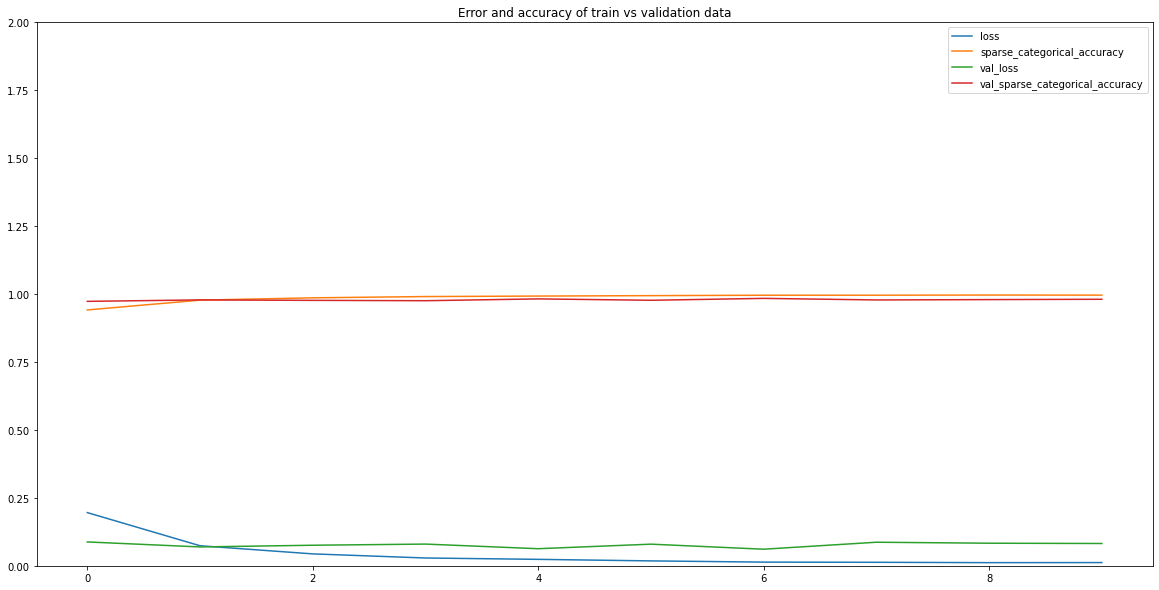

In [8]:
plot_history(history)